In [1]:


import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import pandas as pd
import os


from clean_text import *
from clean_summary import *

In [2]:
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))

TensorFlow Version: 2.3.0


In [3]:

data = pd.read_csv("G:\\master thesis\\bigPatent_dataset_csv\\val\\val_E.csv")
print(data.shape)
data.head()

(1914, 3)


,Publication_number,Description,Summary
0,US-7726913-B1,the invention comprises a pair of tubes with a...,the present invention is an apparatus and a me...
1,US-2005217934-A1,the scaffolding system according to a particul...,a scaffolding system and method of moving a sc...
2,US-2006037749-A1,"now referring to fig1 , there is shown a subte...",a well tool and method for heating and deposit...
3,US-2014259344-A1,embodiments of the disclosure relate to a urin...,the disclosure provides a urinal screen compri...
4,US-4776621-A,the simplest embodiment shown in fig1 has only...,a collector for dog droppings includes a stick...


## data cleaning and preprocessing 

In [4]:
## dropping duplicates
data.drop_duplicates(subset=['Description'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)
print(data.shape)

(1906, 3)


In [5]:
print(len(data['Description']))
print(len(data['Summary']))

1906
1906


In [6]:
cleaned_summary = []
cleaned_text = [] 

In [7]:

for text in data['Description']:
    cleaned_text.append(clean_text(text, remove_stopwords=True))
print("Text preprocessing done.")

Text preprocessing done.


In [8]:


for summary in data['Summary']:
    cleaned_summary.append(clean_summary(summary,remove_stopwords=False))
print("summary preprocessing done.")

summary preprocessing done.


In [9]:

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [10]:
data.shape

(1906, 5)

In [11]:
data.head()

,Publication_number,Description,Summary,cleaned_text,cleaned_summary
0,US-7726913-B1,the invention comprises a pair of tubes with a...,the present invention is an apparatus and a me...,invention comprises pair tubes first tube top ...,the present invention is an apparatus and meth...
1,US-2005217934-A1,the scaffolding system according to a particul...,a scaffolding system and method of moving a sc...,scaffolding system according particular embodi...,scaffolding system and method of moving scaffo...
2,US-2006037749-A1,"now referring to fig1 , there is shown a subte...",a well tool and method for heating and deposit...,referring fig num shown subterranean well well...,well tool and method for heating and depositin...
3,US-2014259344-A1,embodiments of the disclosure relate to a urin...,the disclosure provides a urinal screen compri...,embodiments disclosure relate urinal screen sy...,the disclosure provides urinal screen comprisi...
4,US-4776621-A,the simplest embodiment shown in fig1 has only...,a collector for dog droppings includes a stick...,simplest embodiment shown fig num interchangea...,collector for dog droppings includes stick pro...


In [12]:
print('len of text before cleaning : ',len(data['Description'][0].split()))
print('len of summary before cleaning : ',len(data['Summary'][0].split()))
print('len of text after cleaning : ',len(data['cleaned_text'][0].split()))
print('len of summary after cleaning : ',len(data['cleaned_summary'][0].split()))

len of text before cleaning :  3232
len of summary before cleaning :  53
len of text after cleaning :  1793
len of summary after cleaning :  47


In [13]:
print(data['Summary'][0])

the present invention is an apparatus and a method for casting a cementitious or stone pile into the ground . the present invention comprises an exterior driving casing and an interior mandrel acting in cooperation to hold and deliver the pile forming material . a retrievable driving driving shoe is also disclose .


In [14]:
print(data['cleaned_summary'][0])

the present invention is an apparatus and method for casting cementitious or stone pile into the ground the present invention comprises an exterior driving casing and an interior mandrel acting in cooperation to hold and deliver the pile forming material retrievable driving driving shoe is also disclose 


In [15]:
print(data['Description'][0])

the invention comprises a pair of tubes with a first tube having a top and bottom . the bottom of the first tube comprises an open bottom and has an interior profile , the preferred profile is frusto - conical . the second tube having a top and bottom . the bottom of the second tube having a preferred exterior profile that is adapted to mate with the interior profile of the first tube , thereby sealing the open bottom of the first tube when the profiles come into contact with each other . open slots are provided for in the profile of the second tube to allow transfer of material from the interior of the second tube out through the open bottom of the first tube when the profiles disengage . a more specific detail of the preferred embodiment is further discussed below . the preferred embodiment 100 comprises an exterior casing 6 and an interior mandrel 5 . see , e . g , fig1 . the casing 6 and mandrel 5 may be of any cross section so long as mandrel 5 is able to fit slidably within casin

In [16]:
print(data['cleaned_text'][0])

invention comprises pair tubes first tube top bottom bottom first tube comprises open bottom interior profile preferred profile frusto conical second tube top bottom bottom second tube preferred exterior profile adapted mate interior profile first tube thereby sealing open bottom first tube profiles come contact open slots provided profile second tube allow transfer material interior second tube open bottom first tube profiles disengage specific detail preferred embodiment discussed preferred embodiment num comprises exterior casing num interior mandrel num see fig num casing num mandrel num may cross section long mandrel num able fit slidably within casing num tubes upper end lower end upper end mandrel num first pile driver receiving plate num receives direct blows pile driver pile driver plate num turn rest second plate num annular opening whereby mandrel num may inserted plate num attached top end casing num pile driver shown strikes plate num energy strike transmitted plate num tu

### Statistics of data before cleaning 

In [35]:
text_word_count = []
summary_word_count = []
for i in data['Description']:
      text_word_count.append(len(i.split()))
#text_word_count  
total_word_des = sum(text_word_count)
avg_word_description = total_word_des/len(text_word_count)
print('average number of word in description: ',avg_word_description)
print('Maximum number of words in description',max(text_word_count))
print('Minimum number of words in description',min(text_word_count))
for i in data['Summary']:
      summary_word_count.append(len(i.split()))
        
total_word_sum = sum(summary_word_count)
avg_word_sum = total_word_sum/len(summary_word_count)
print('average number of word in summary: ',avg_word_sum)
print('Maximum number of words in Summary',max(summary_word_count))
print('Minimum number of words in Summary',min(summary_word_count))        

average number of word in description:  2708.1810073452257
Maximum number of words in description 24116
Minimum number of words in description 390
average number of word in summary:  116.00472193074502
Maximum number of words in Summary 362
Minimum number of words in Summary 21


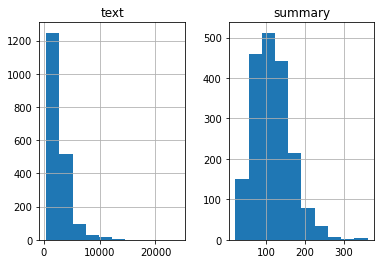

In [20]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['Description']:
      text_word_count.append(len(i.split()))

for i in data['Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist()#bins = 30'
plt.show()

### Statistics of data after cleaning 

In [36]:
text_word_count = []
summary_word_count = []
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))
#text_word_count  
total_word_des = sum(text_word_count)
avg_word_description = total_word_des/len(text_word_count)
print('average number of word in clean description: ',avg_word_description)
print('Maximum number of words in description',max(text_word_count))
print('Minimum number of words in description',min(text_word_count))
for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))
        
total_word_sum = sum(summary_word_count)
avg_word_sum = total_word_sum/len(summary_word_count)
print('average number of word in clean summary: ',avg_word_sum)
print('Maximum number of words in Summary',max(summary_word_count))
print('Minimum number of words in Summary',min(summary_word_count))

average number of word in clean description:  1461.3824763903463
Maximum number of words in description 12687
Minimum number of words in description 215
average number of word in clean summary:  101.6479538300105
Maximum number of words in Summary 322
Minimum number of words in Summary 18


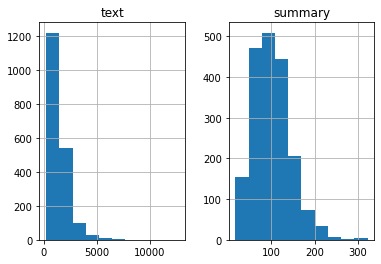

In [21]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist()#bins = 30
plt.show()



What has been done during data preprocessing:
1. Remove duplicate columns
2. contractions implementation
3. Currancy Regex
4. Email Regex
5. Remove Punctuation
6. Remove Stopwords
7. Remove URL
8. Apply Lemmatization